In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona
import statistics

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from os import listdir
from os.path import isfile, join

platoon_3_2022_09_14_08_4.csv ---> 0.0046
platoon_3_2022_09_14_09_10_09.csv ---> 0.0046
platoon_3_2022_09_14_09_3.csv ---> 0.0046
platoon_3_2022_09_14_11_45.csv ---> 0.0046
platoon_3_2022_09_14_12_06.csv ---> 0.0046
platoon_3_2022_09_14_12_27.csv ---> 0.0046
platoon_3_2022_09_14_12_48.csv ---> 0.0046
platoon_3_2022_09_15_08_50.csv ---> 0.0025
platoon_3_2022_09_15_09_2.csv ---> 0.0025
platoon_3_2022_09_15_09_59.csv ---> 0.0025
platoon_3_2022_09_15_11_38.csv ---> 0.0025
platoon_6.csv ---> 0.0101
platoon_6_0.csv ---> 0.0002
platoon_6_1.csv ---> 0.001
platoon_6_2.csv ---> 0.001
platoon_6_3.csv ---> 0.0038
platoon_6_4.csv ---> 0.0101


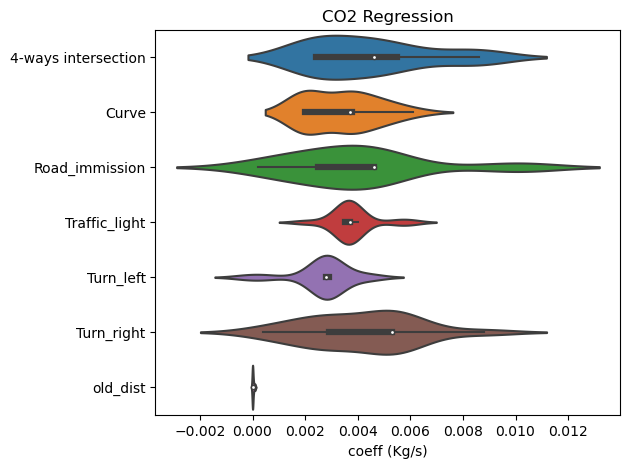

In [2]:
mypath = '../results/CO2/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
allfiles = []
for i in range(len(onlyfiles)):
    if onlyfiles[i].startswith('s_'):
        continue
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=',', decimal='.').iloc[:,1:3]
    df.columns = ['infrastructure', 'coefficient']
    print(onlyfiles[i],'--->',min(df[df['infrastructure']=='Feat_Road_immission']['coefficient']))
    allfiles.append(df)
coeff = pd.concat(allfiles)
coeff = coeff.replace('Feat_','',regex=True)
coeff
figure(figsize=(6, 5), dpi=100)
fig = sns.violinplot(data=coeff, x="coefficient", y="infrastructure", scale="count")
fig.set(ylabel=None)
plt.title('CO2 Regression')
plt.xlabel('coeff (Kg/s)')
plt.savefig('../figure/coeff_co2.pdf',bbox_inches='tight')
plt.show()


platoon_3_2022_09_14_08_4.csv ---> 14.7967
platoon_3_2022_09_14_09_10_09.csv ---> 14.7967
platoon_3_2022_09_14_09_3.csv ---> 14.7967
platoon_3_2022_09_14_11_45.csv ---> 14.7967
platoon_3_2022_09_14_12_06.csv ---> 14.7967
platoon_3_2022_09_14_12_27.csv ---> 14.7967
platoon_3_2022_09_14_12_48.csv ---> 14.7967
platoon_3_2022_09_15_08_50.csv ---> 57.3927
platoon_3_2022_09_15_09_2.csv ---> 57.3927
platoon_3_2022_09_15_09_59.csv ---> 57.3927
platoon_3_2022_09_15_11_38.csv ---> 57.3927
platoon_6.csv ---> 13.8288
platoon_6_0.csv ---> 0.5417
platoon_6_1.csv ---> 13.3456
platoon_6_2.csv ---> -4.3136
platoon_6_4.csv ---> 13.8288


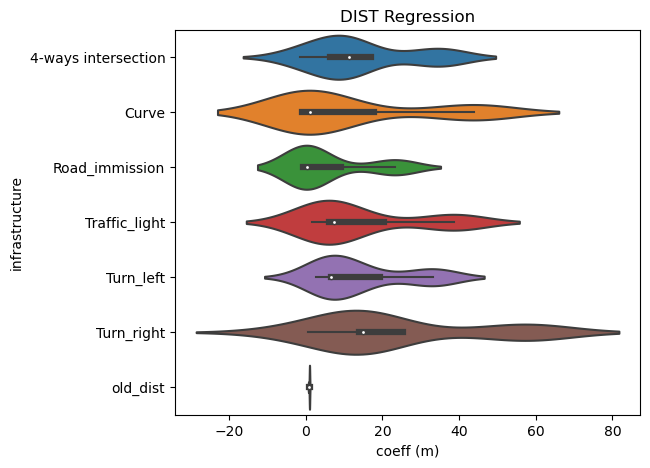

In [3]:
mypath = '../results/Dist/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
allfiles = []
for i in range(len(onlyfiles)):
    if onlyfiles[i].startswith('s_'):
        continue
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=',', decimal='.').iloc[:,1:3]
    df.columns = ['infrastructure', 'coefficient']
    print(onlyfiles[i],'--->',max(df[df['infrastructure']=='Feat_Turn_right']['coefficient']))
    allfiles.append(df)
coeff2 = pd.concat(allfiles)
coeff2 = coeff2.replace('Feat_','',regex=True)
coeff2
figure(figsize=(6, 5), dpi=100)
fig2 = sns.violinplot(data=coeff2, x="coefficient", y="infrastructure", scale="count")
fig.set(ylabel=None)
plt.title('DIST Regression')
plt.xlabel('coeff (m)')
plt.savefig('../figure/coeff_dist.pdf',bbox_inches='tight')
plt.show()

In [11]:
avg_co2_cooeff = coeff.groupby(['infrastructure'])[['coefficient']].mean().reset_index()
avg_ivd_cooeff = coeff2.groupby(['infrastructure'])[['coefficient']].mean().reset_index()
avg_coeff = pd.concat([avg_co2_cooeff,avg_ivd_cooeff],axis=1)
avg_coeff.columns = ['FEAT','AVG. CO2 COEFF.','dummy','AVG. DIST COEFF.']
avg_coeff = avg_coeff[['FEAT','AVG. DIST COEFF.','AVG. CO2 COEFF.']]
avg_coeff['FEAT'] = ['FW','C','RI','TL','LT','RT','PREV DIST']
print(avg_coeff.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
     FEAT &  AVG. DIST COEFF. &  AVG. CO2 COEFF. \\
\midrule
       FW &         14.226844 &          2.21060 \\
        C &         11.905875 &          4.26728 \\
       RI &          6.016369 &          1.63860 \\
       TL &         14.301731 &          4.71094 \\
       LT &         14.338138 &         10.34392 \\
       RT &         23.148687 &          7.44626 \\
PREV DIST &          0.910150 &          0.80110 \\
\bottomrule
\end{tabular}



C:\Users\marco\AppData\Local\Temp\ipykernel_21380\3872348724.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(avg_coeff.to_latex(index=False))


In [5]:

for index,row in avg_coeff.iterrows():
    print(row['FEAT'].lower().replace('4-ways intersection','four_way'),'=',row['AVG. DIST COEFF.'],',')

four_way = 14.226843749999999 ,
curve = 11.905875 ,
road_immission = 6.01636875 ,
traffic_light = 14.301731250000001 ,
turn_left = 14.3381375 ,
turn_right = 23.148687499999998 ,
old_dist = 0.91015 ,


In [6]:
for index,row in avg_coeff.iterrows():
    print(row['FEAT'].lower().replace('4-ways intersection','four_way'),'=',row['AVG. CO2 COEFF.'],',')

four_way = 0.004488235294117647 ,
curve = 0.003358823529411765 ,
road_immission = 0.004023529411764706 ,
traffic_light = 0.003788235294117647 ,
turn_left = 0.0026588235294117647 ,
turn_right = 0.004111764705882353 ,
old_dist = 1.548648823529412e-05 ,


# Divide platoons of 3, and platoons of 6

platoon_3_2022_09_14_08_4.csv ---> 0.0046
platoon_3_2022_09_14_09_10_09.csv ---> 0.0046
platoon_3_2022_09_14_09_3.csv ---> 0.0046
platoon_3_2022_09_14_11_45.csv ---> 0.0046
platoon_3_2022_09_14_12_06.csv ---> 0.0046
platoon_3_2022_09_14_12_27.csv ---> 0.0046
platoon_3_2022_09_14_12_48.csv ---> 0.0046
platoon_3_2022_09_15_08_50.csv ---> 0.0025
platoon_3_2022_09_15_09_2.csv ---> 0.0025
platoon_3_2022_09_15_09_59.csv ---> 0.0025
platoon_3_2022_09_15_11_38.csv ---> 0.0025


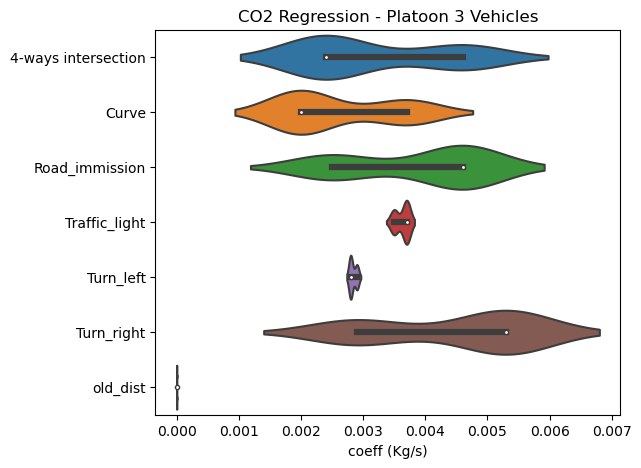

platoon_6.csv ---> 0.0101
platoon_6_0.csv ---> 0.0002
platoon_6_1.csv ---> 0.001
platoon_6_2.csv ---> 0.001
platoon_6_3.csv ---> 0.0038
platoon_6_4.csv ---> 0.0101


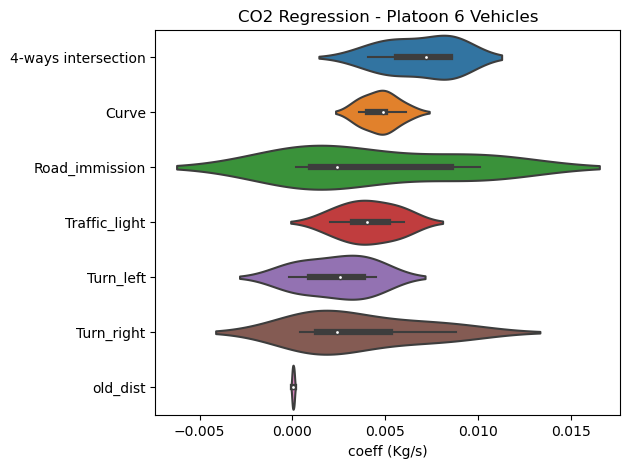

platoon_3_2022_09_14_08_4.csv ---> 14.7967
platoon_3_2022_09_14_09_10_09.csv ---> 14.7967
platoon_3_2022_09_14_09_3.csv ---> 14.7967
platoon_3_2022_09_14_11_45.csv ---> 14.7967
platoon_3_2022_09_14_12_06.csv ---> 14.7967
platoon_3_2022_09_14_12_27.csv ---> 14.7967
platoon_3_2022_09_14_12_48.csv ---> 14.7967
platoon_3_2022_09_15_08_50.csv ---> 57.3927
platoon_3_2022_09_15_09_2.csv ---> 57.3927
platoon_3_2022_09_15_09_59.csv ---> 57.3927
platoon_3_2022_09_15_11_38.csv ---> 57.3927


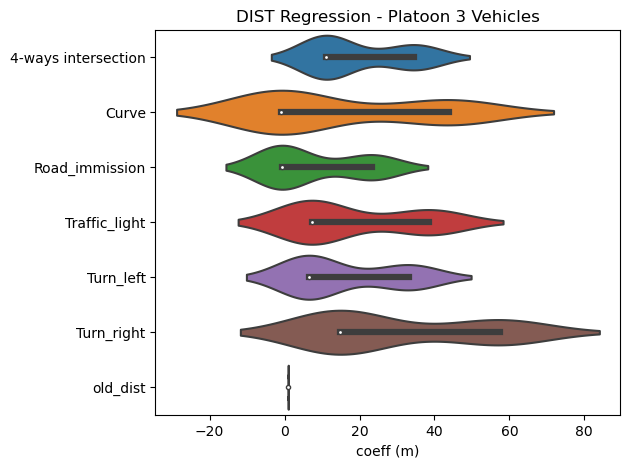

platoon_6.csv ---> 13.8288
platoon_6_0.csv ---> 0.5417
platoon_6_1.csv ---> 13.3456
platoon_6_2.csv ---> -4.3136
platoon_6_4.csv ---> 13.8288


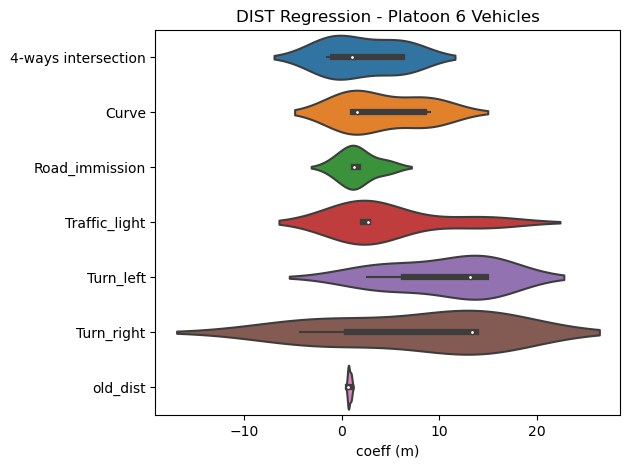

In [7]:

for suffix in ['platoon_3','platoon_6']:
    mypath = '../results/CO2/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if suffix in f]
    allfiles = []
    for i in range(len(onlyfiles)):
        if onlyfiles[i].startswith('s_'):
            continue

        df = pd.read_csv(mypath + str(onlyfiles[i]), sep=',', decimal='.').iloc[:,1:3]
        df.columns = ['infrastructure', 'coefficient']
        print(onlyfiles[i],'--->',max(df[df['infrastructure']=='Feat_Road_immission']['coefficient']))
        allfiles.append(df)
    coeff = pd.concat(allfiles)
    coeff = coeff.replace('Feat_','',regex=True)
    coeff
    figure(figsize=(6, 5), dpi=100)
    fig = sns.violinplot(data=coeff, x="coefficient", y="infrastructure", scale="count")
    fig.set(ylabel=None)
    plt.title(f'CO2 Regression - {suffix.title().replace("_"," ")} Vehicles')
    plt.xlabel('coeff (Kg/s)')
    plt.savefig(f'../figure/coeff_co2_{suffix}.pdf',bbox_inches='tight')
    plt.show()

for suffix in ['platoon_3','platoon_6']:
    mypath = '../results/Dist/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if suffix in f]
    allfiles = []
    for i in range(len(onlyfiles)):
        if onlyfiles[i].startswith('s_'):
            continue

        df = pd.read_csv(mypath + str(onlyfiles[i]), sep=',', decimal='.').iloc[:,1:3]
        df.columns = ['infrastructure', 'coefficient']
        print(onlyfiles[i],'--->',min(df[df['infrastructure']=='Feat_Turn_right']['coefficient']))
        allfiles.append(df)
    coeff = pd.concat(allfiles)
    coeff = coeff.replace('Feat_','',regex=True)
    coeff
    figure(figsize=(6, 5), dpi=100)
    fig = sns.violinplot(data=coeff, x="coefficient", y="infrastructure", scale="count")
    fig.set(ylabel=None)
    plt.title(f'DIST Regression - {suffix.title().replace("_"," ")} Vehicles')
    plt.xlabel('coeff (m)')
    plt.savefig(f'../figure/coeff_dist_{suffix}.pdf',bbox_inches='tight')
    plt.show()